# k-Nearest Neighbors

KNN es uno de los algoritmos de ML más simples. La idea detrás de este algoritmo es encontrar los puntos más cercanos a un valor ("sus vecinos más cercanos") para poder encontrar cual sería el valor de este punto o a qué clase pertenece.

In [11]:
from imports import *

## KNN para clasificación

In [8]:
X, y = mglearn.datasets.make_forge()

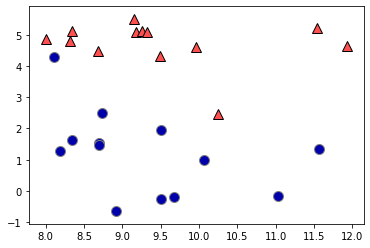

In [9]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

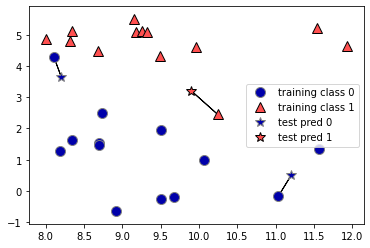

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

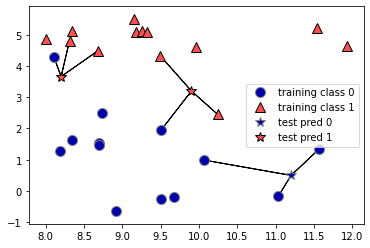

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

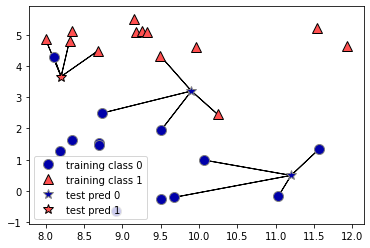

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

## Ejemplo

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_test

array([1, 1, 1, 1, 1, 1])

In [19]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1])

In [20]:
clf.score(X_test,y_test)

0.8333333333333334

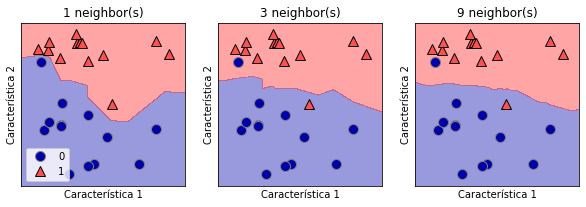

In [24]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True,
                                   eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")
axes[0].legend(loc=3)

## Ejemplo

In [25]:
from sklearn.datasets import load_breast_cancer

In [26]:
cancer = load_breast_cancer()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=66)

In [39]:
training_acc = []
test_acc = []

neighbors = range(1,11)

In [40]:
for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # Accuracy para el training set
    training_acc.append(clf.score(X_train,y_train))
    # Accuracy para el test set
    test_acc.append(clf.score(X_test, y_test))

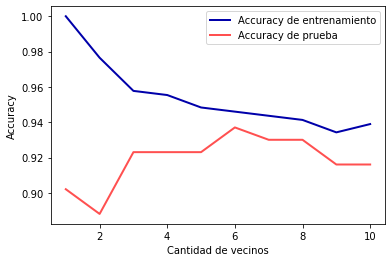

In [41]:
plt.plot(neighbors, training_acc, label="Accuracy de entrenamiento")
plt.plot(neighbors, test_acc, label="Accuracy de prueba")
plt.ylabel("Accuracy")
plt.xlabel("Cantidad de vecinos")
plt.legend()

## KNN para regresión

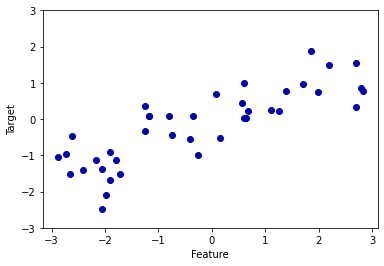

In [44]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, "o")
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

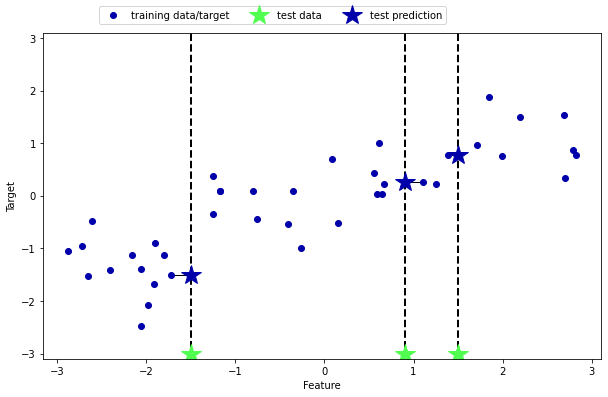

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

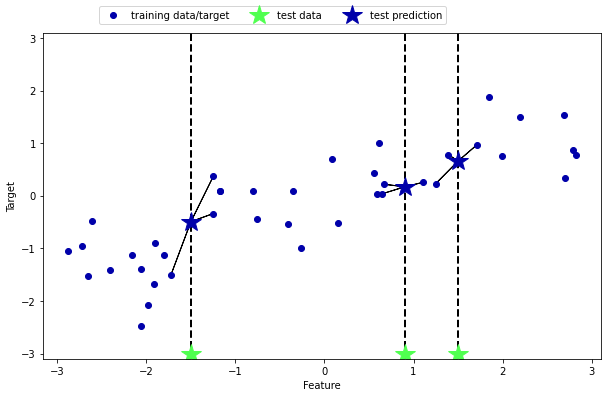

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## Ejemplo

In [47]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [49]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
y_test

array([ 0.373,  0.218,  0.967, -1.388, -1.06 , -0.905,  0.437,  0.779,
       -0.541, -0.957])

In [52]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

In [53]:
reg.score(X_test,y_test)

0.8344172446249605

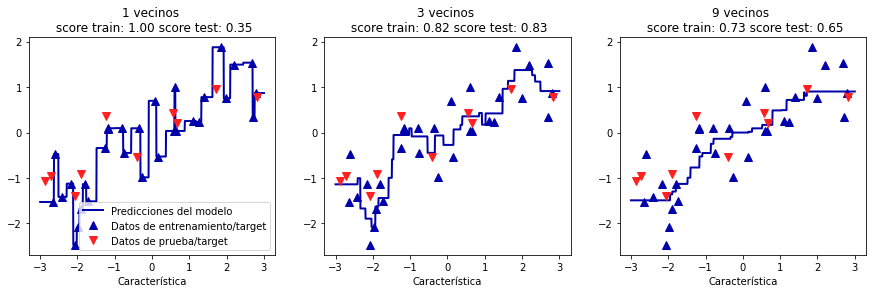

In [58]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} vecinos \n score train: {:.2f} score test: {:.2f}".format(
    n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("Característica")
    ax.set_label("Target")
    axes[0].legend(["Predicciones del modelo", "Datos de entrenamiento/target", 
                   "Datos de prueba/target"], loc="best")